In [1]:
import numpy as np

class Perceptron:
    '''퍼셉트론 분류기
    
    매개변수
    -------------
    eta : float
        학습률(0.0과 1.0 사이)
    n-iter L int
    훈련데이터셋 반복 회수 : 에포크
    
    random_state : int
    난수 생성 시드(난수값을 고정)
    
    속성(클래스 내부에서 사용할 변수)
    w_ : 1d array
        학습할 가중치
    b_ : 스칼라
        학습할 가중치
    
    error : list
    에포크마다 누적된 분류 오류(오차)
    
    '''
    
    def __init__(self,eta=0.01,n_iter=50,random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
        
    def fit(self,X,y): # 학습 메소드
        '''
        훈련 데이터 학습
        
        매개변수
        --------------------------------------------------
        X : {array-like}, shape=[n_samples,n_features]
        n_samples 개의 샘플데이터, n_feautres개의 특성(컬럼)으로 이뤄진 훈련데이터
        
        y : array-like, shape=[n_samples]
        원래 답(타깃 값)
        
        반환 값(return value)
        ----------------------------
        self : object
        '''
        rgen=np.random.RandomState(self.random_state) # 시드 적용
        self.w_=rgen.normal(
            loc=0.0
            ,scale=0.01
            ,size=X.shape[1] # X 2차원 행렬 -> (행,열)
        )
        
        self.b_= np.float_(0.)
        self_errors_=[] # 빈리스트 : 오차 저장할 리스트
        
        #학습
        for _ in range(self.n_iter): # 순수하게 반복만 진행
            errors = 0 # 1회 학습시 나오는 오차를 저장하는 변수
            for xi, target in zip(X,y):
                update = self.eta *(target-self.predict(xi)) # 오차를 구한다
                self.w_ += update*xi
                self.b_ += update
                errors += int(update!=0.0)
            
            self_errors_.append(errors) # 1에포크 마다  오차를 저장하는 함수
        return self # java의 this와 같음 : 오브젝트를 접근 할 수 있는 변수
    
    def net_input(self,X):
        '''
        입력 계산 : Z
        '''
        return np.dot(X,self.w_) + self.b_
    
    def predict(self, X): # 입력 데이터를 받아서 예측값을 반환 : 0,1
        # np.where(w조건, 참일경우, 거짓일 경우)
        return np.where(self.net_input(X)>=0.0,1,0)
    


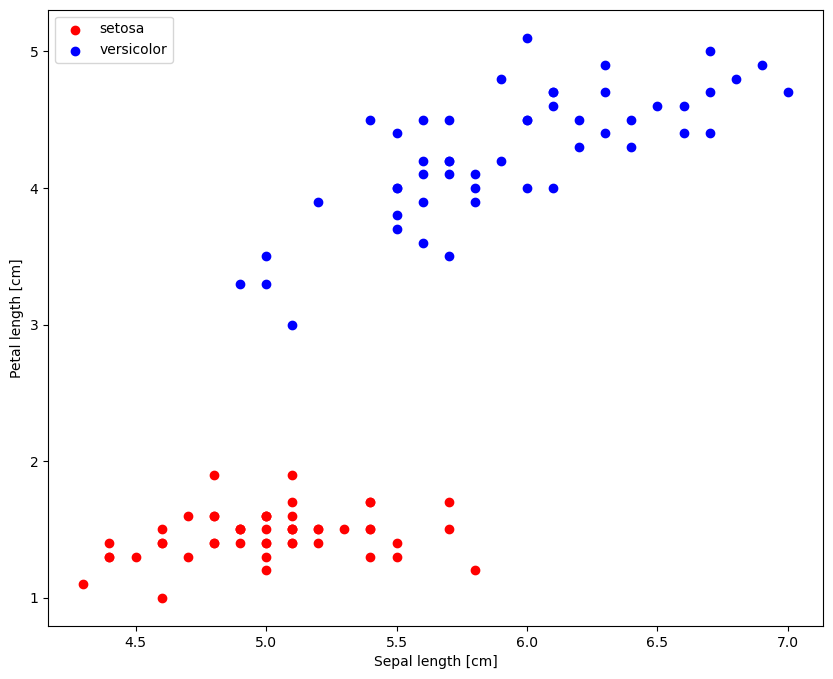

In [2]:
# 붓꽃 데이터셋에서 퍼셉트론 훈련
import os
import pandas as pd
s= 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'


df = pd.read_csv(
    s
    , header = None
    , encoding='utf-8'
)

# 시각화
import matplotlib.pyplot as plt

# setosa랑 versicolor를 선택
y=df.iloc[0:100,4].values #품정 추출

# setosa이면 0, versicolor이면 1로 출력

y=np.where(y=='Iris-setosa',0,1)

# 꽃의 길이 df[0],df[2], 꽃의 넓이 : df[1], df[3]
# data 추출 : 꽃받침, 꽃잎의 길이 데이터를 추출
X=df.iloc[0:100,[0,2]].values

# setosa와 versicolor 데이터 분포 확인

# 산점도 setosa
plt.figure(figsize=(10,8))
plt.scatter(
    x=X[:50,0]
    ,y=X[:50,1]
    ,color='red'
    ,marker='o'
    ,label='setosa'
)

plt.scatter(
    x=X[50:100,0]
    ,y=X[50:100,1]
    ,color='blue'
    ,marker='o'
    ,label='versicolor'

)

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()
